In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

steps_df = pd.read_excel("step_calorie_data.xlsx")
water_df = pd.read_csv("waterminder-logs.csv")
weather_df = pd.read_excel("weatherrl.xlsx")

steps_df["Date"] = pd.to_datetime(steps_df["Date"])
water_df["Date"] = pd.to_datetime(water_df["Date"], format="%d.%m.%Y")
weather_df["Date"] = pd.to_datetime(weather_df["date"])

water_daily = water_df.groupby("Date")["Hydration Value(ml)"].sum().reset_index()
water_daily.rename(columns={"Hydration Value(ml)": "Total Water (ml)"}, inplace=True)

weather_daily = weather_df[["Date", "tavg", "rhum"]].copy()
weather_daily.rename(columns={
    "tavg": "Avg Temp (°C)",
    "rhum": "Avg Humidity (%)"
}, inplace=True)

steps_df = steps_df.rename(columns={
    "Calories Burned (kcal)": "Calories Burned by Step (kcal)"
})
merged_df = pd.merge(steps_df[["Date", "Calories Burned by Step (kcal)"]], water_daily, on="Date", how="inner")
merged_df = pd.merge(merged_df, weather_daily, on="Date", how="inner")
merged_df = merged_df.sort_values("Date").reset_index(drop=True)
merged_df.to_excel("final_dsa210_dataset_calorie_by_step.xlsx", index=False)
merged_df.head()
df = pd.read_excel("final_dsa210_dataset_calorie_by_step.xlsx")



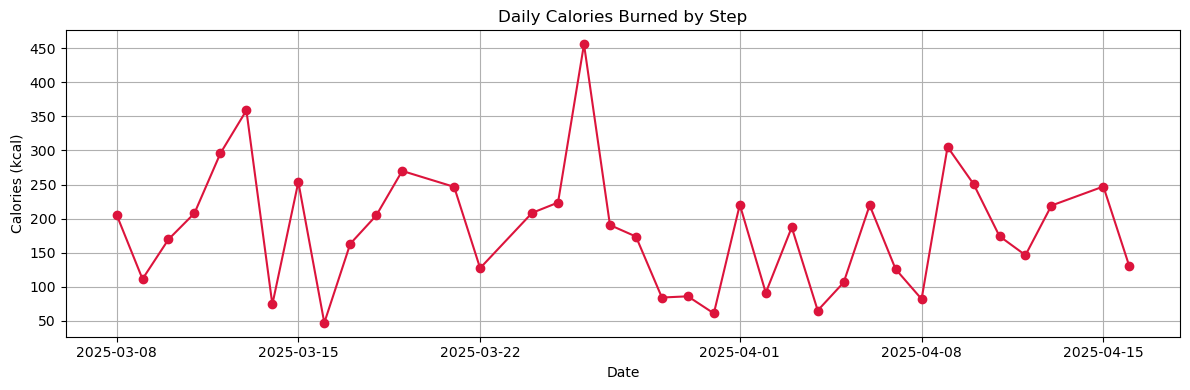

In [25]:
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["Calories Burned by Step (kcal)"], marker='o', color='crimson')
plt.title("Daily Calories Burned by Step")
plt.xlabel("Date")
plt.ylabel("Calories (kcal)")
plt.grid()
plt.tight_layout()
plt.show()

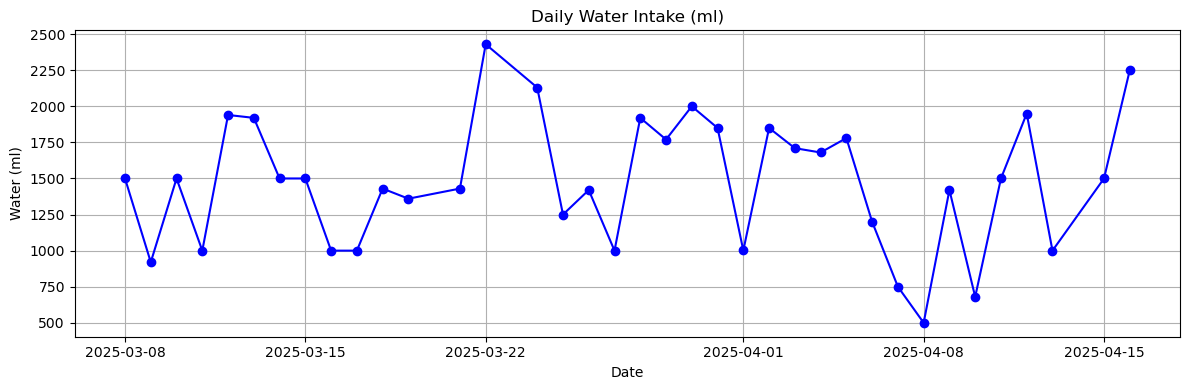

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["Total Water (ml)"], color='blue', marker='o')
plt.title("Daily Water Intake (ml)")
plt.xlabel("Date")
plt.ylabel("Water (ml)")
plt.grid()
plt.tight_layout()
plt.show()

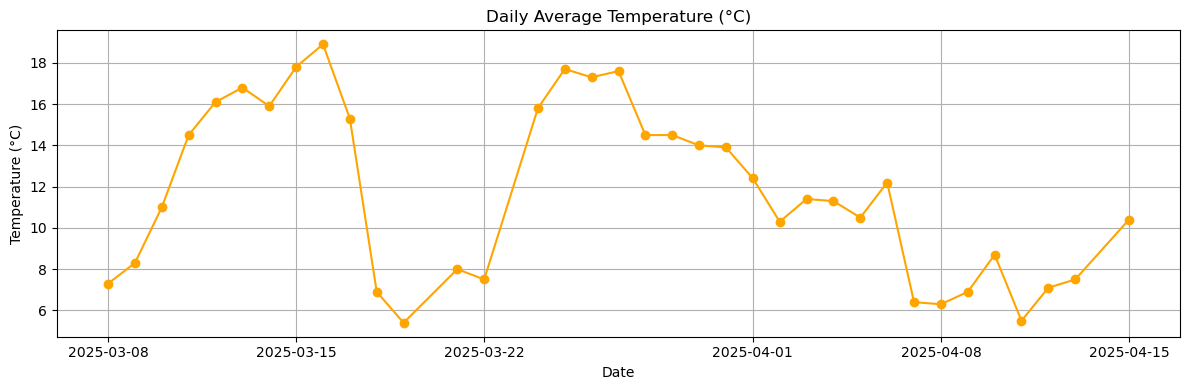

In [29]:
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["Avg Temp (°C)"], color='orange', marker='o')
plt.title("Daily Average Temperature (°C)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.tight_layout()
plt.show()

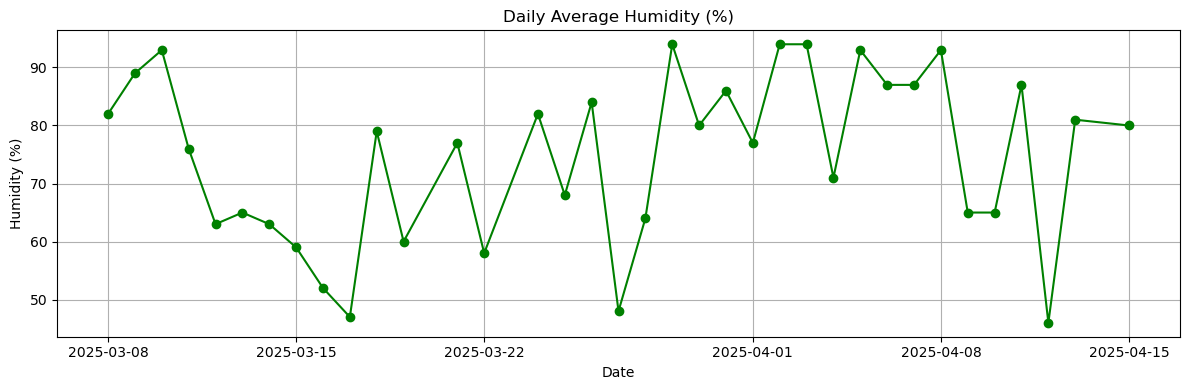

In [31]:
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["Avg Humidity (%)"], color='green', marker='o')
plt.title("Daily Average Humidity (%)")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()
plt.show()

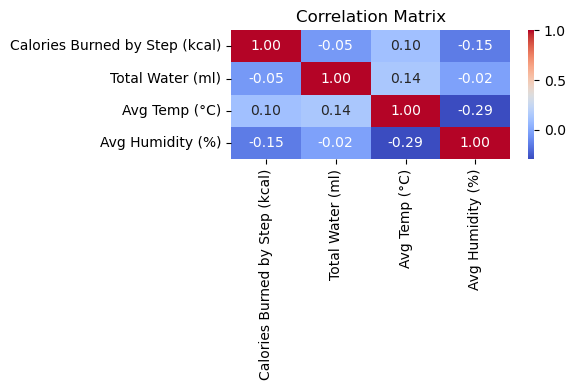

In [33]:
correlation = df[[
    "Calories Burned by Step (kcal)",
    "Total Water (ml)",
    "Avg Temp (°C)",
    "Avg Humidity (%)"
]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [35]:
# H0: No correlation (ρ = 0)
# H1: Positive correlation (ρ > 0)

temp_water_df = df[["Avg Temp (°C)", "Total Water (ml)"]].dropna()
r_value, p_value = pearsonr(temp_water_df["Avg Temp (°C)"], temp_water_df["Total Water (ml)"])

print("Hypothesis Test: Temperature vs. Water Intake")
print(f"Pearson correlation coefficient (r): {r_value:.4f}")
print(f"One-tailed p-value: {p_value / 2:.4f}")

alpha = 0.05
if p_value / 2 < alpha and r_value > 0:
    print("Result: Reject H0 → Statistically significant positive correlation.")
else:
    print("Result: Fail to reject H0 → No significant positive correlation found.")

Hypothesis Test: Temperature vs. Water Intake
Pearson correlation coefficient (r): 0.1407
One-tailed p-value: 0.2066
Result: Fail to reject H0 → No significant positive correlation found.


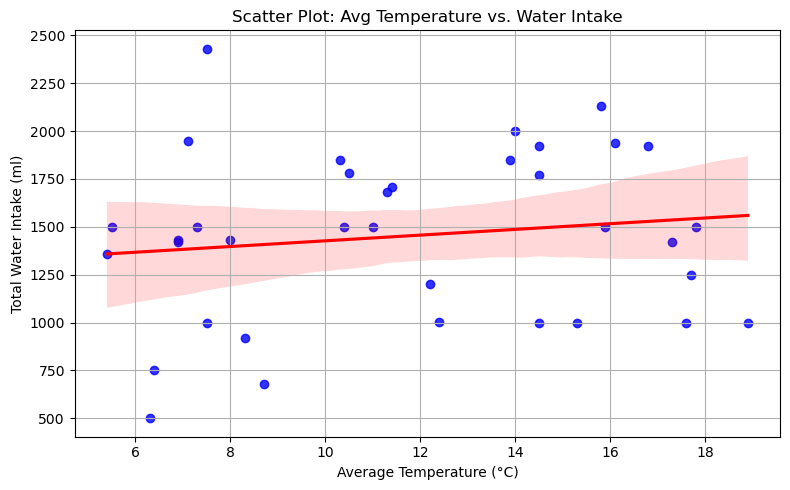

In [37]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x="Avg Temp (°C)",
    y="Total Water (ml)",
    data=temp_water_df,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)
plt.title("Scatter Plot: Avg Temperature vs. Water Intake")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Total Water Intake (ml)")
plt.grid()
plt.tight_layout()
plt.show()